# Episode 7 - Basic MNIST with tf.contrib.learn

## mnist问题
- 计算机视觉领域的Hello world
- 给定55000个图片，处理成28*28的二维矩阵，矩阵中每个值表示一个像素点的灰度，作为feature
- 给定每张图片对应的字符，作为label，总共有10个label，是一个多分类问题



此代码是针对TensorFlow 0.10.0rc0进行测试的。 你可以在这里找到一个docker镜像：https://hub.docker.com/r/tensorflow/tensorflow/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

## Import the dataset

下载解压mnist数据，每个img已经灰度化成长784的数组，每个label已经one-hot成长度10的数组

In [2]:
mnist = learn.datasets.load_dataset('mnist')

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


numpy读取图像到内存，用于后续操作，包括训练集（只取前10000个）和验证集

In [3]:
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

列车中有55k个例子，在eval中有10k个例子。您可能希望限制大小以更快地进行实验。

In [4]:
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

## Display some digits

In [5]:
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)    

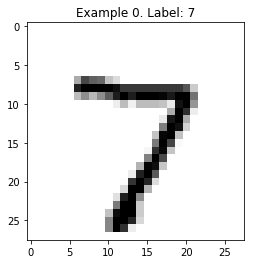

In [6]:
display(0)

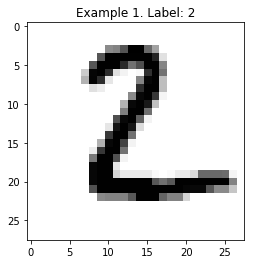

In [7]:
display(1)

These digits are clearly drawn. Here's one that's not.

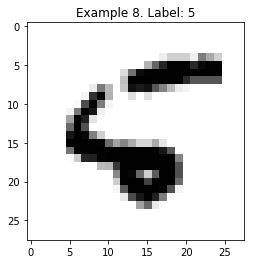

In [8]:
display(8)

Now let's take a look at how many features we have.

In [10]:
print (len(data[0]))

784


## 拟合一个线性分类器

我们这里的目标是用这个简单的分类器获得约90％的准确度。 有关这些工作的更多细节，请参阅 https://www.tensorflow.org/versions/r0.10/tutorials/mnist/beginners/index.html#mnist-for-ml-beginners

In [11]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

LinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x1a25df5278>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'optimizer': None, 'gradient_clip_norm': None, 'joint_weights': False})

## 评估准确性

In [13]:
classifier.evaluate(test_data, test_labels)
print (classifier.evaluate(test_data, test_labels)["accuracy"])

0.9137


## 分几个例子

我们可以使用预测方法对单个图像进行预测

In [14]:
# here's one it gets right
print ("Predicted %d, Label: %d" % (classifier.predict(test_data[0]), test_labels[0]))
display(0)

InvalidArgumentError: tensor_name = linear//weight; shape in shape_and_slice spec [1,10] does not match the shape stored in checkpoint: [784,10]
	 [[Node: save/RestoreV2_1 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save/Const_0_0, save/RestoreV2_1/tensor_names, save/RestoreV2_1/shape_and_slices)]]

Caused by op 'save/RestoreV2_1', defined at:
  File "/Users/apple/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/apple/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-0354ba381638>", line 2, in <module>
    print ("Predicted %d, Label: %d" % (classifier.predict(test_data[0]), test_labels[0]))
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 347, in new_func
    return func(*args, **kwargs)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 347, in new_func
    return func(*args, **kwargs)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/linear.py", line 530, in predict
    as_iterable=as_iterable)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 347, in new_func
    return func(*args, **kwargs)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/linear.py", line 565, in predict_classes
    as_iterable=as_iterable)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 289, in new_func
    return func(*args, **kwargs)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py", line 590, in predict
    as_iterable=as_iterable)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py", line 890, in _infer_model
    config=self._session_config))
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 648, in __init__
    stop_grace_period_secs=stop_grace_period_secs)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 477, in __init__
    self._sess = _RecoverableSession(self._coordinated_creator)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 822, in __init__
    _WrappedSession.__init__(self, self._create_session())
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 827, in _create_session
    return self._sess_creator.create_session()
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 538, in create_session
    self.tf_sess = self._session_creator.create_session()
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 403, in create_session
    self._scaffold.finalize()
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 203, in finalize
    self._saver = training_saver._get_saver_or_default()  # pylint: disable=protected-access
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 736, in _get_saver_or_default
    saver = Saver(sharded=True, allow_empty=True)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1139, in __init__
    self.build()
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1170, in build
    restore_sequentially=self._restore_sequentially)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 687, in build
    restore_sequentially, reshape)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 450, in _AddShardedRestoreOps
    name="restore_shard"))
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 407, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 247, in restore_op
    [spec.tensor.dtype])[0])
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 640, in restore_v2
    dtypes=dtypes, name=name)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): tensor_name = linear//weight; shape in shape_and_slice spec [1,10] does not match the shape stored in checkpoint: [784,10]
	 [[Node: save/RestoreV2_1 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save/Const_0_0, save/RestoreV2_1/tensor_names, save/RestoreV2_1/shape_and_slices)]]


In [15]:
# and one it gets wrong
print ("Predicted %d, Label: %d" % (classifier.predict(test_data[8]), test_labels[8]))
display(8)

InvalidArgumentError: tensor_name = linear//weight; shape in shape_and_slice spec [1,10] does not match the shape stored in checkpoint: [784,10]
	 [[Node: save/RestoreV2_1 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save/Const_0_0, save/RestoreV2_1/tensor_names, save/RestoreV2_1/shape_and_slices)]]

Caused by op 'save/RestoreV2_1', defined at:
  File "/Users/apple/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/apple/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-3a89add2bd61>", line 2, in <module>
    print ("Predicted %d, Label: %d" % (classifier.predict(test_data[8]), test_labels[8]))
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 347, in new_func
    return func(*args, **kwargs)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 347, in new_func
    return func(*args, **kwargs)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/linear.py", line 530, in predict
    as_iterable=as_iterable)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 347, in new_func
    return func(*args, **kwargs)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/linear.py", line 565, in predict_classes
    as_iterable=as_iterable)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 289, in new_func
    return func(*args, **kwargs)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py", line 590, in predict
    as_iterable=as_iterable)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/estimators/estimator.py", line 890, in _infer_model
    config=self._session_config))
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 648, in __init__
    stop_grace_period_secs=stop_grace_period_secs)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 477, in __init__
    self._sess = _RecoverableSession(self._coordinated_creator)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 822, in __init__
    _WrappedSession.__init__(self, self._create_session())
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 827, in _create_session
    return self._sess_creator.create_session()
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 538, in create_session
    self.tf_sess = self._session_creator.create_session()
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 403, in create_session
    self._scaffold.finalize()
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 203, in finalize
    self._saver = training_saver._get_saver_or_default()  # pylint: disable=protected-access
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 736, in _get_saver_or_default
    saver = Saver(sharded=True, allow_empty=True)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1139, in __init__
    self.build()
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1170, in build
    restore_sequentially=self._restore_sequentially)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 687, in build
    restore_sequentially, reshape)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 450, in _AddShardedRestoreOps
    name="restore_shard"))
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 407, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 247, in restore_op
    [spec.tensor.dtype])[0])
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 640, in restore_v2
    dtypes=dtypes, name=name)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/apple/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): tensor_name = linear//weight; shape in shape_and_slice spec [1,10] does not match the shape stored in checkpoint: [784,10]
	 [[Node: save/RestoreV2_1 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save/Const_0_0, save/RestoreV2_1/tensor_names, save/RestoreV2_1/shape_and_slices)]]


## 可视化学习权重


让我们来看看我们是否可以重现TensorFlow Basic MNSIT中权重的图片 <a href="https://www.tensorflow.org/tutorials/mnist/beginners/index.html#mnist-for-ml-beginners">tutorial</a>. 

In [16]:
weights = classifier.weights_
f, axes = plt.subplots(2, 5, figsize=(10,4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(()) # ticks be gone
    a.set_yticks(())
plt.show()

AttributeError: 'LinearClassifier' object has no attribute 'weights_'

- 这里展示了8个张图中，每个像素点（也就是feature）的weights，
- 红色表示正的权重，蓝色表示负的权重
- 作用越大的像素，它的颜色越深，也就是权重越大
- 所以权重中红色部分几乎展示了正确的数字

# 下一步

* TensorFlow Docker images: https://hub.docker.com/r/tensorflow/tensorflow/ 
* TF.Learn Quickstart: https://www.tensorflow.org/versions/r0.9/tutorials/tflearn/index.html
* MNIST tutorial: https://www.tensorflow.org/tutorials/mnist/beginners/index.html
* Visualizating MNIST: http://colah.github.io/posts/2014-10-Visualizing-MNIST/
* Additional notebooks: https://github.com/tensorflow/tensorflow/tree/master/tensorflow/tools/docker/notebooks
* More about linear classifiers: https://www.tensorflow.org/versions/r0.10/tutorials/linear/overview.html#large-scale-linear-models-with-tensorflow
* Much more about linear classifiers: http://cs231n.github.io/linear-classify/
* Additional TF.Learn samples: https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/skflow